# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single datase
complete_dataset = pd.merge(study_results,mouse_metadata, on=["Mouse ID"],how= "left")


# Display the data table for preview
complete_dataset.head(6)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30


In [2]:
# Checking the number of mice.
mice_total= complete_dataset["Mouse ID"].unique().size
mice_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice = complete_dataset.duplicated(["Mouse ID",  "Timepoint"])
#complete_dataset [duplicate_mice]


duplicate_mice = complete_dataset.loc[complete_dataset.duplicated(subset=["Mouse ID",  "Timepoint"]),"Mouse ID"].unique ()

duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateID= complete_dataset[complete_dataset["Mouse ID"]=="g989"]
duplicateID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#To remove duplicates based on specific columns, I used subset.


duplicateID2 = duplicateID.index

no_duplicates = complete_dataset.drop(duplicateID2)
no_duplicates


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_recount= no_duplicates["Mouse ID"].nunique()
mice_recount

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Calculating  the mean
mean_tumor_vol= no_duplicates.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor_vol

#Calculating the median
median_tumor_vol=no_duplicates.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor_vol

#Calculating the variance
variance_tumor_vol= no_duplicates.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance_tumor_vol

#Calculating std deviation
std_dev_tumor_vol= no_duplicates.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_dev_tumor_vol

#Calculating SEM
SEM_tumor_vol =no_duplicates.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
SEM_tumor_vol

summary_tumor_vol = {
    "MeanTumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance":variance_tumor_vol,
    "Tumor Volume Std. Dev.":std_dev_tumor_vol,
    "Tumor Volume Std. Err.":SEM_tumor_vol
}


summary_tumors_df =pd.DataFrame(summary_tumor_vol)
summary_tumors_df


,MeanTumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_tumors_df2 = no_duplicates.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

summary_tumors_df2



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

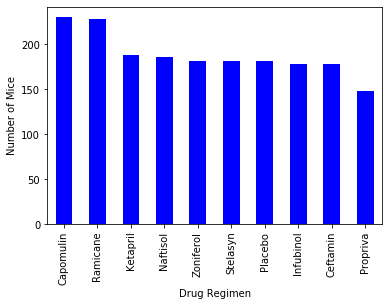

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
micebyregimen = no_duplicates["Drug Regimen"].value_counts()
#micebyregimen = pd.DataFrame(no_duplicates.groupby(["Drug Regimen"]).count())["Mouse ID"]
micebyregimen

micebyregimen_plot = micebyregimen.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

<BarContainer object of 10 artists>

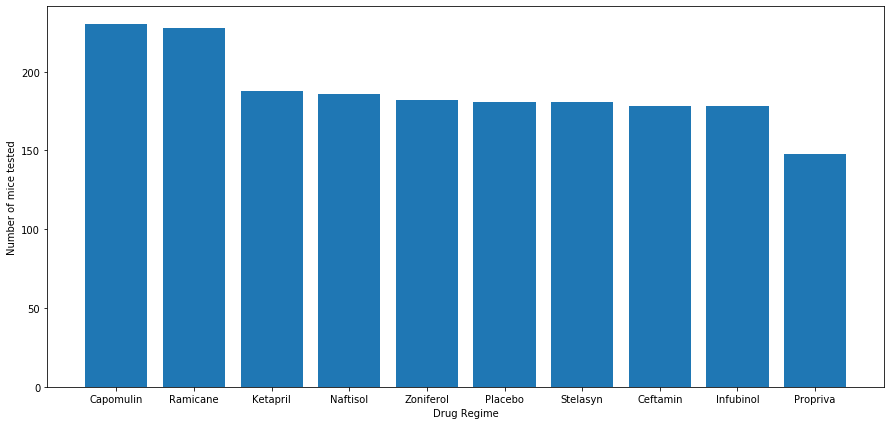

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
micebyregimen = pd.DataFrame(no_duplicates.groupby(["Drug Regimen"]).count()["Mouse ID"])

#We need to put in in descending order so it can be equal to the one asked for.. so:
micebyregimen= micebyregimen.sort_values("Mouse ID", ascending=False)

#Check the data frame
#micebyregimen   

plt.figure(figsize=[15,7])
plt.xlabel("Drug Regime")
plt.ylabel("Number of mice tested")
plt.bar (micebyregimen.index, micebyregimen ["Mouse ID"])


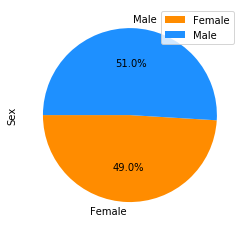

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
bysex= no_duplicates.groupby(["Sex"]).count()

bysex_df= pd.DataFrame (bysex["Mouse ID"])
#bysex_df

bysex_df.rename(columns = {"Mouse ID" : "Sex"}, inplace =True)
bysex_df

colors = ["darkorange", "dodgerblue"]

bysex_df.plot.pie(y= "Sex", autopct="%1.1f%%", startangle= 180, colors=colors)

#another way to plot the same pie chart 
#bysex_df.plot(kind = "pie", y= "Sex", autopct="%1.00f%%", startangle= 180, colors=colors)

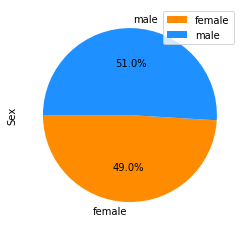

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

bysex2= no_duplicates.groupby(["Sex"]).count()["Mouse ID"]
#to get the info 
#bysex2

Sex = ["female", "male"]
Number = [922, 958]


colors= colors = ["darkorange", "dodgerblue"]
plt.pie (Number, labels=Sex, colors = colors, autopct="%1.1f%%",startangle=180)
plt.ylabel ("Sex")
plt.legend(labels= Sex, loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_per_mouse= no_duplicates.groupby(["Mouse ID"]).max()["Timepoint"]
timepoint_per_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_complete = pd.merge (timepoint_per_mouse, no_duplicates, how = "left", on =["Mouse ID", "Timepoint"])
#timepoint_complete



timepoint_complete[["Mouse ID", "Tumor Volume (mm3)","Drug Regimen"]][(timepoint_complete["Drug Regimen"]=="Capomulin")|(timepoint_complete["Drug Regimen"]=="Ramicane")|(timepoint_complete["Drug Regimen"]=="Infubinol")|(timepoint_complete["Drug Regimen"]=="Ceftamin")]
timepoint_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Drug_reg:
    tumor_data = timepoint_complete[timepoint_complete["Drug Regimen"]== drug]["Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   

    quatiles = tumor_data.quantile ([.25, .5, .75])
    upperq = quatiles [.75]
    lowerq= quatiles [.25]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    # add subset 
    tumor_vol_data.append(tumor_data)

    # Determine outliers using upper and lower bounds
    print(f"{drug} potential outliers: {tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


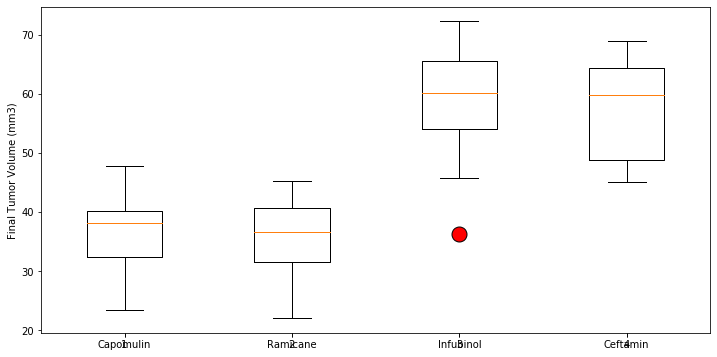

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=[12,6])
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], fontsize=10)
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_vol_data, flierprops={"markerfacecolor":"red","markersize":15})
plt.show()


## Line and Scatter Plots

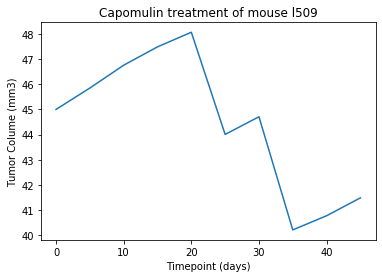

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tv_id_l509 = no_duplicates[["Tumor Volume (mm3)"]][(no_duplicates["Mouse ID"]== "l509")]
tp_id_l509 = no_duplicates[["Timepoint"]][(no_duplicates["Mouse ID"]== "l509")]

plt.plot(tp_id_l509,tv_id_l509)
plt.ylabel ("Tumor Colume (mm3)")
plt.xlabel ("Timepoint (days)")
plt.title ("Capomulin treatment of mouse l509")
plt.show()

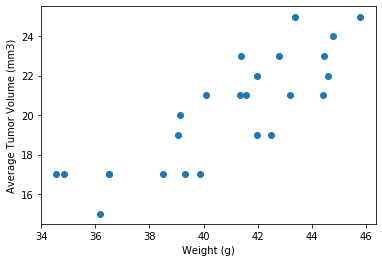

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

no_duplicates_capomulin = no_duplicates[(no_duplicates["Drug Regimen"] == "Capomulin")]
#no_duplicates_capomulin

no_duplicates_capomulin_tumor= no_duplicates_capomulin.groupby(["Mouse ID"]).mean()
#no_duplicates_capomulin_tumor

xvalue= no_duplicates_capomulin_tumor ["Tumor Volume (mm3)"]
yvalue= no_duplicates_capomulin_tumor ["Weight (g)"]

plt.scatter (xvalue, yvalue)
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


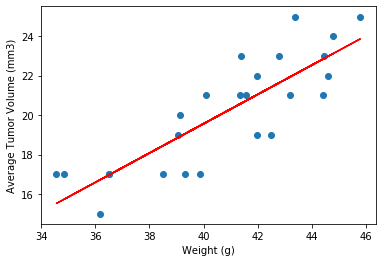

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr (xvalue,yvalue)
#will print at the bottom.

(slope, intercept, rvalue,pvalue,stderr) = linregress (xvalue,yvalue)
regression_data = xvalue * slope + intercept

equation= "y= " + str(round (slope,2))+ "x + " + str(round(intercept,2))

plt.scatter (xvalue, yvalue)
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")

#The "r-" makes the line red
plt.plot (xvalue, regression_data, "r-")

print (f"The correlation between mouse weight and average tumor volume is {round(corr[0],2)}")

plt.show()